In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Read in data
years = ["2020", "2021", "2022", "2023", "2024"]
columns = ["ISO Time", "Temperature (C)", "Humidity (%)", "Pressure (kPa)", "Air Quality (Ohms)"]
all_data = pd.read_csv("./data/2023_BME680SensorData.csv", usecols=columns)

for year in years:
    data_filename = f"./data/{year}_BME680SensorData.csv"
    read_in_data = pd.read_csv(data_filename, usecols=columns)
    all_data = pd.concat([all_data, read_in_data], ignore_index=True)

print("Data Collected")
all_data.head()


all_data["ISO Time"] = pd.to_datetime(all_data["ISO Time"])
all_data.set_index("ISO Time", inplace=True)
hourly_avg = all_data.resample("H").mean()

Data Collected


<Figure size 1400x500 with 0 Axes>

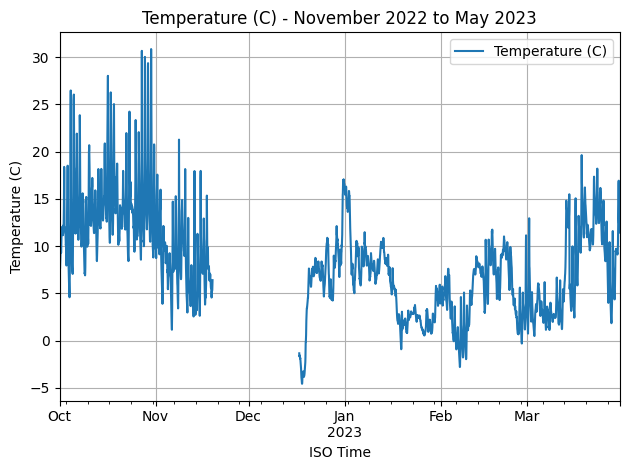

<Figure size 1400x500 with 0 Axes>

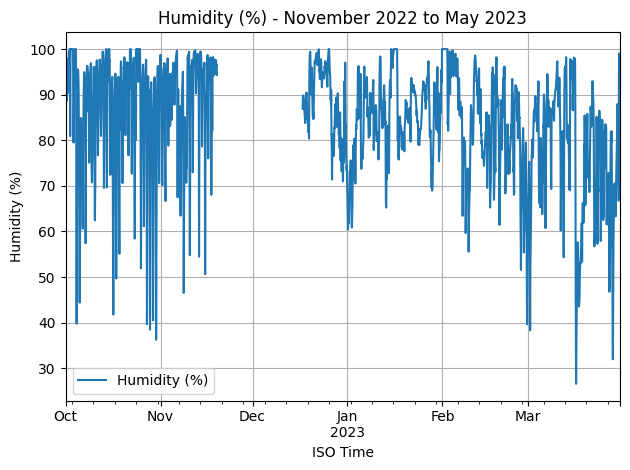

<Figure size 1400x500 with 0 Axes>

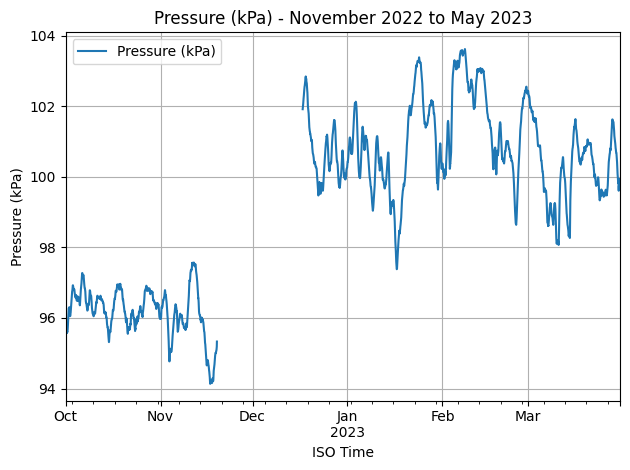

<Figure size 1400x500 with 0 Axes>

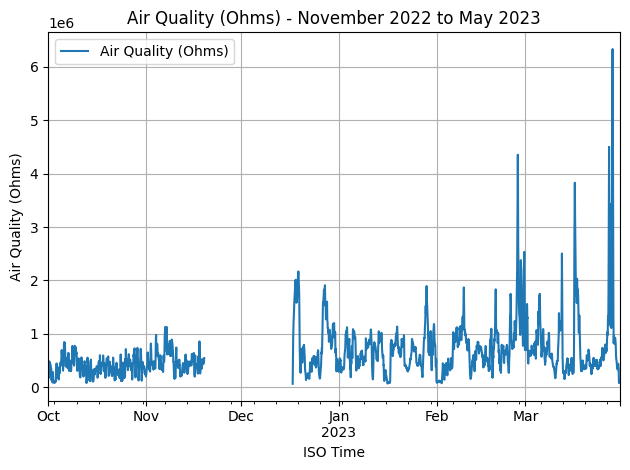

In [4]:

# Filter data from November 2022 to May 2023
start_date = '2022-10-01'
end_date = '2023-03-30'
filtered_data = hourly_avg.loc[start_date:end_date]

# Plot each variable
var_names = columns[1:]
for variable in var_names:
    plt.figure(figsize=(14, 5))
    filtered_data.plot(y=variable)
    plt.title(f"{variable} - November 2022 to May 2023")
    plt.ylabel(variable)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Figure size 1400x500 with 0 Axes>

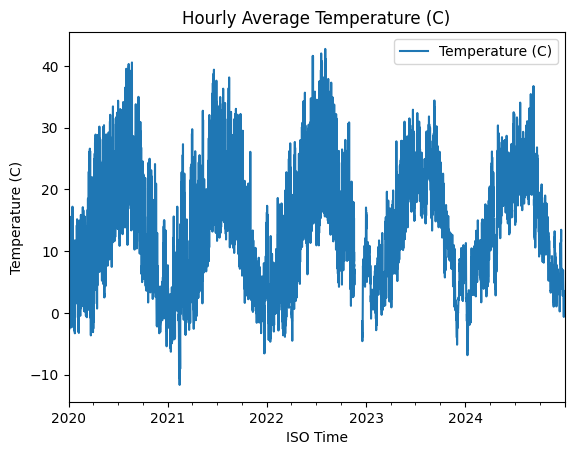

<Figure size 1400x500 with 0 Axes>

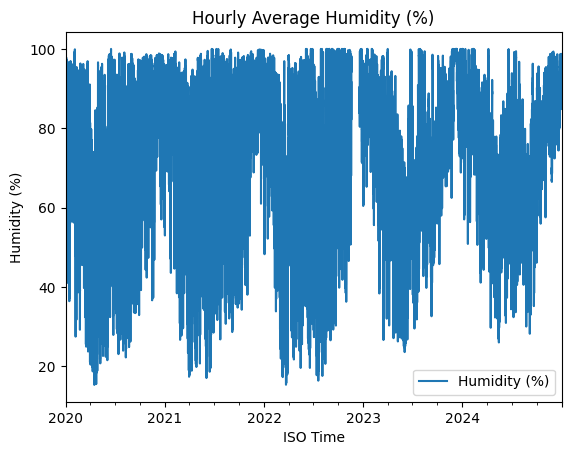

<Figure size 1400x500 with 0 Axes>

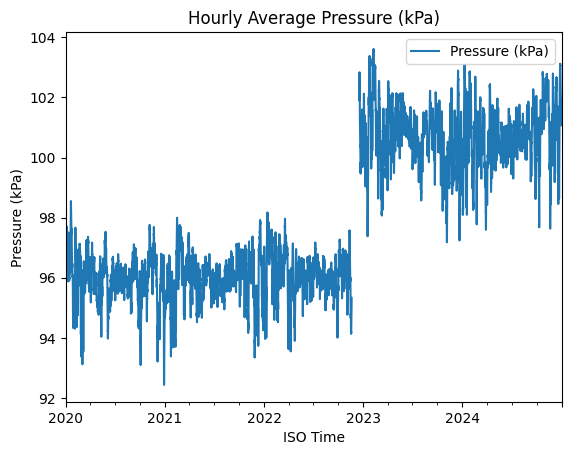

<Figure size 1400x500 with 0 Axes>

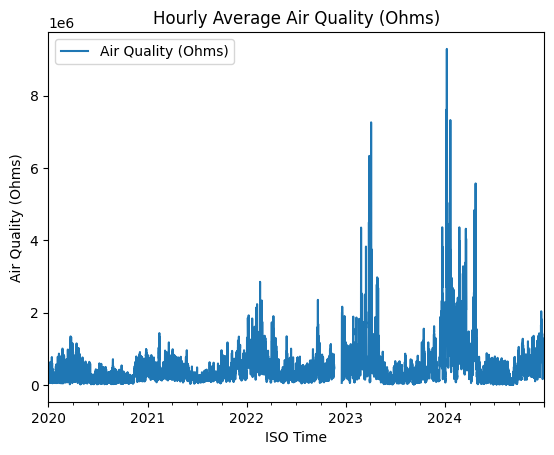

In [5]:
var_names = columns[1:]

for variable in var_names:
    plt.figure(figsize=(14, 5))
    hourly_avg.plot(y=variable)
    plt.title(f"Hourly Average {variable}")
    plt.ylabel(variable)
    plt.show()

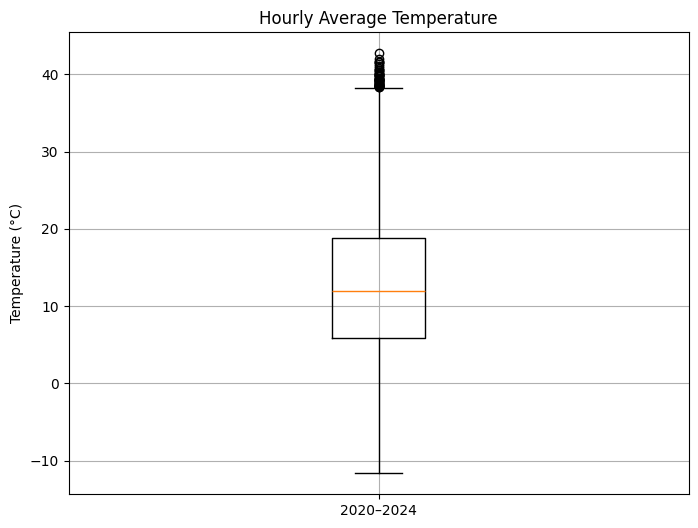

In [6]:
import matplotlib.pyplot as plt

# Drop NaN values to avoid errors in boxplot
temperature_data = hourly_avg["Temperature (C)"].dropna()

# Create the boxplot
plt.figure(figsize=(8, 6))
plt.boxplot(temperature_data, vert=True)
plt.title("Hourly Average Temperature")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.xticks([1], ["2020–2024"])
plt.show()


<Figure size 1000x600 with 0 Axes>

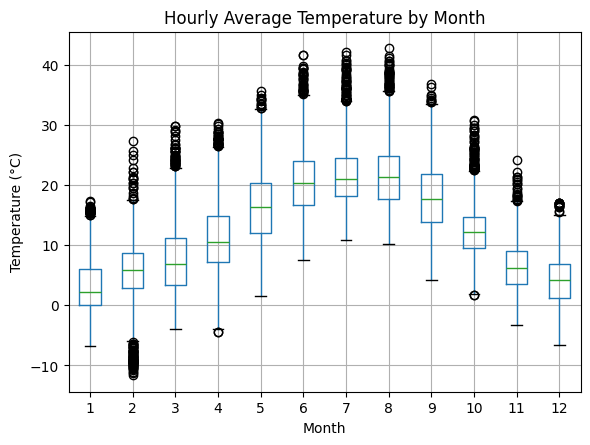

In [7]:
# Add a 'Month' column
hourly_avg["Month"] = hourly_avg.index.month

# Create boxplot by month
plt.figure(figsize=(10, 6))
hourly_avg.boxplot(column="Temperature (C)", by="Month")
plt.title("Hourly Average Temperature by Month")
plt.suptitle("")  # Remove default 'Boxplot grouped by ...' title
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()


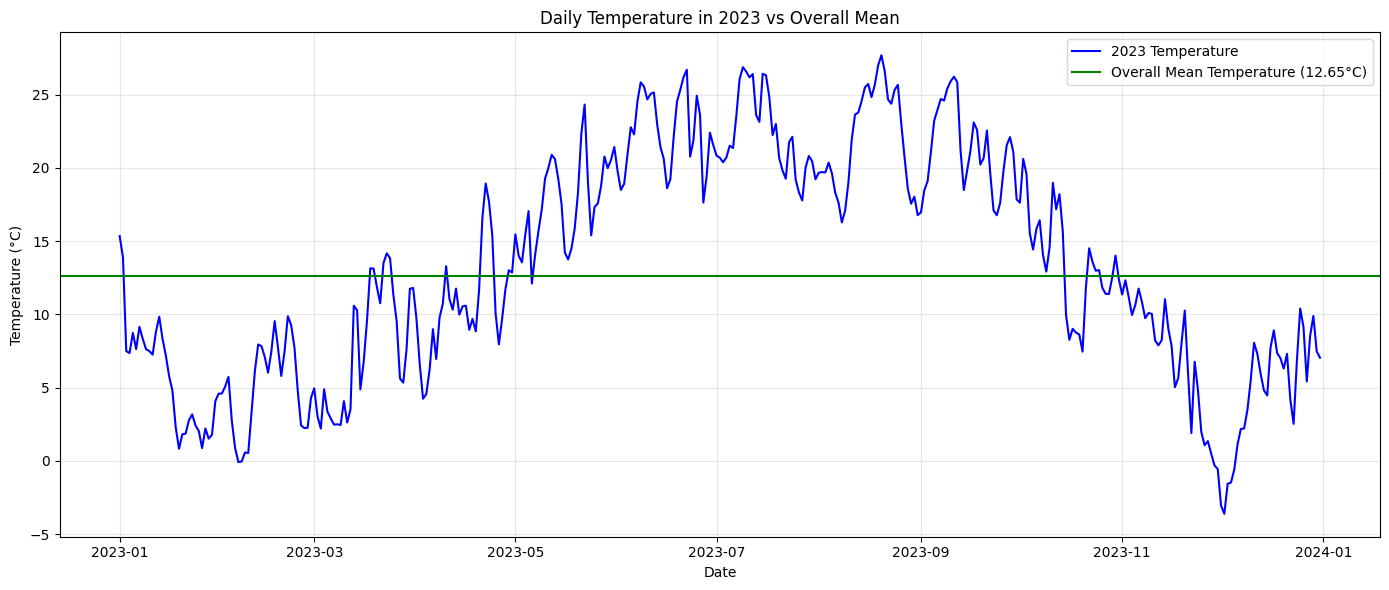

In [9]:

# Calculate the overall mean temperature across all years
overall_mean_temp = all_data["Temperature (C)"].mean()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(one_year_data.index, one_year_data['Temperature (C)'], color='blue', label=f'{year_to_plot} Temperature')
plt.axhline(y=overall_mean_temp, color='green', linestyle='-', label=f'Overall Mean Temperature ({overall_mean_temp:.2f}°C)')
plt.title(f'Daily Temperature in {year_to_plot} vs Overall Mean')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()